# UCI Machine Learning - Adult

Details about the Adult dataset can be found on the UCI site.

Load the packages that will be used:

In [1]:
using CSV, DataFrames, Random, Statistics, StatsBase, DataStructures, Pipe, Plots, DecisionTree, MLBase
ENV["COLUMNS"] = 500

500

Download the dataset:

In [2]:
download("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", "adult.data")
download("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test", "adult.test")

"adult.test"

Load the training data into a DataFrame. The downloaded file contains no headers so we use `rename` to add them:

In [2]:
readlines("adult.test")[1:5]

5-element Vector{String}:
 "|1x3 Cross validator"
 "25, Private, 226802, 11th, 7, Never-married, Machine-op-inspct, Own-child, Black, Male, 0, 0, 40, United-States, <=50K."
 "38, Private, 89814, HS-grad, 9, Married-civ-spouse, Farming-fishing, Husband, White, Male, 0, 0, 50, United-States, <=50K."
 "28, Local-gov, 336951, Assoc-acdm, 12, Married-civ-spouse, Protective-serv, Husband, White, Male, 0, 0, 40, United-States, >50K."
 "44, Private, 160323, Some-college, 10, Married-civ-spouse, Machine-op-inspct, Husband, Black, Male, 7688, 0, 40, United-States, >50K."

In [52]:
function shuffle(df::DataFrame)
    df[Random.shuffle(1:end), :]
end

headers = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship",
           "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "target"]

dftrain = @pipe CSV.File("adult.data") |>
DataFrame |>
shuffle |>
rename(_, headers);

View a random sample of the data:

In [53]:
rand(eachrow(dftrain), 5) |> DataFrame

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
,Int64,String,Int64,String,Int64,String,String,String,String,String,Int64,Int64,Int64,String,String
1,44,Private,278476,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
2,55,Private,271710,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,45,United-States,<=50K
3,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
4,41,Self-emp-not-inc,141327,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,0,0,35,United-States,<=50K
5,42,Private,137907,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K


In [54]:
dftest = @pipe CSV.File("adult.test", header=false, skipto=2) |>
DataFrame |>
shuffle |>
rename(_, headers);

In [55]:
rand(eachrow(dftest), 5) |> DataFrame

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
,Int64,String,Int64,String,Int64,String,String,String,String,String,Int64,Int64,Int64,String,String
1,30,Self-emp-not-inc,96480,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,60,United-States,>50K.
2,42,Federal-gov,178074,Masters,14,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,1902,40,United-States,>50K.
3,62,Private,185503,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K.
4,42,Private,350550,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,<=50K.
5,37,Private,35429,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,1506,0,40,United-States,<=50K.


In [56]:
describe(dftrain)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,age,38.5816,17,37.0,90,0,Int64
2,workclass,,?,,Without-pay,0,String
3,fnlwgt,1.89782e5,12285,178363.0,1484705,0,Int64
4,education,,10th,,Some-college,0,String
5,education_num,10.0806,1,10.0,16,0,Int64
6,marital_status,,Divorced,,Widowed,0,String
7,occupation,,?,,Transport-moving,0,String
8,relationship,,Husband,,Wife,0,String
9,race,,Amer-Indian-Eskimo,,White,0,String


In [57]:
unique(vcat(dftrain.target, dftest.target))

4-element Vector{String}:
 " <=50K"
 " >50K"
 " >50K."
 " <=50K."

In [58]:
dftest.target = replace.(dftest.target, "." => "");

In [67]:
dftrain = @pipe CSV.File("adult.data") |>
DataFrame |>
shuffle |>
rename(_, headers);

In [68]:
lentrain = floor(Int, .8 * nrow(dftrain))
trainids = sample(1:nrow(dftrain), lentrain, replace=false)
validatids = setdiff(1:nrow(dftrain), trainids)

@show length(trainids)
@show length(validatids)

length(trainids) = 26048
length(validatids) = 6512


6512

In [69]:
function encodetarget(target)    
    map(x -> x == " <=50K" ? true : false, target)
end

function encodecat(col)
    @pipe col |>
        labelmap |>
        labelencode(_, col)
end

function encodecat(df::DataFrame)
    catcols = select(df, findall(col -> eltype(col) <: String, eachcol(df)))
    for (colname, col) in zip(names(catcols), eachcol(catcols))
        df = DataFrames.transform(df, colname => encodecat => colname)
    end
    df
end

function normalizenumcols(df::DataFrame)
    normalize(data) = (data .- mean(data, dims=1)) ./ std(data, dims=1)
    
    numcols = select(df, findall(col -> eltype(col) <: Number, eachcol(df)))
    for (colname, col) in zip(names(numcols), eachcol(numcols))
        df = DataFrames.transform(df, colname => normalize => colname)
    end
    df
end

function preprocesspipe(df)
    @pipe df |>
    encodecat |>
#     normalizenumcols |>
    Matrix
end

ytrain = encodetarget(dftrain[trainids, :target])
Xtrain = preprocesspipe(dftrain[trainids, Not(:target)])
yvalidat = encodetarget(dftrain[validatids, :target])
Xvalidat = preprocesspipe(dftrain[validatids, Not(:target)])
ytest = encodetarget(dftest[:, :target])
Xtest = preprocesspipe(dftest[:, Not(:target)])

@pipe hcat(Xtrain, ytrain) |> DataFrame(_, headers) |> rand(eachrow(_), 5) |> DataFrame

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,23,2,200318,10,12,4,5,4,1,2,0,0,20,1,1
2,32,5,240979,3,10,1,2,1,1,1,0,0,60,1,0
3,20,2,691830,4,9,4,8,3,2,2,0,0,35,1,1
4,33,2,134886,3,10,4,5,3,1,2,99999,0,30,1,0
5,57,2,223214,4,9,1,8,1,1,1,0,0,50,1,1


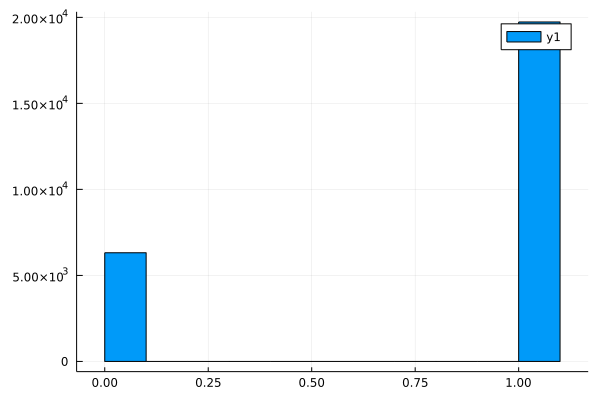

In [72]:
histogram(ytrain)

# Correlations

In [73]:
@pipe hcat(Xtrain, ytrain) |>
Matrix |>
cor(_, _) |>
DataFrame(_, headers) |>
insertcols!(_, 1, :feature => headers)

,feature,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,age,1.0,0.0943266,-0.0759189,0.0762887,0.0405695,-0.40817,-0.0632728,-0.239356,-0.0375338,-0.087554,0.0783422,0.0559231,0.0719078,0.00960231,-0.236831
2,workclass,0.0943266,1.0,-0.0152957,0.0258947,0.115564,-0.0144281,-0.086575,0.00518066,0.0454228,0.0450385,-0.0254234,0.00502221,-0.0608195,-0.0255893,-0.0207796
3,fnlwgt,-0.0759189,-0.0152957,1.0,0.0200516,-0.0461911,0.0423401,0.00218327,0.0215828,-0.0109469,-0.0231212,-0.000548703,-0.0141503,-0.0227331,0.0177199,0.0120564
4,education,0.0762887,0.0258947,0.0200516,1.0,-0.0833408,-0.0180324,-0.015696,0.00177158,0.0165629,-0.0219911,-0.00491028,0.0103497,0.000235544,0.0719063,-0.0269962
5,education_num,0.0405695,0.115564,-0.0461911,-0.0833408,1.0,-0.0852259,-0.221412,-0.0494797,-0.0356246,-0.0143279,0.121568,0.0857288,0.144499,-0.010839,-0.333953
6,marital_status,-0.40817,-0.0144281,0.0423401,-0.0180324,-0.0852259,1.0,0.0900831,0.614741,0.0886037,0.362252,-0.0821224,-0.0792578,-0.202768,0.0125633,0.42372
7,occupation,-0.0632728,-0.086575,0.00218327,-0.015696,-0.221412,0.0900831,1.0,0.0614844,0.0400714,0.0778531,-0.0459518,-0.0313803,-0.0637164,0.0116685,0.116218
8,relationship,-0.239356,0.00518066,0.0215828,0.00177158,-0.0494797,0.614741,0.0614844,1.0,0.0679442,0.469437,-0.0558199,-0.0455362,-0.191746,0.0338063,0.288128
9,race,-0.0375338,0.0454228,-0.0109469,0.0165629,-0.0356246,0.0886037,0.0400714,0.0679442,1.0,0.0716097,-0.00912261,-0.0163077,-0.0308807,0.198545,0.0651211


In [74]:
model = build_forest(ytrain, Xtrain)

Ensemble of Decision Trees
Trees:      10
Avg Leaves: 2722.3
Avg Depth:  46.2

In [78]:
accuracy(x::ROCNums) = (true_positive(x) + true_negative(x)) / (true_positive(x) + true_negative(x) + false_positive(x) + false_negative(x))

preds = apply_forest(model, Xvalidat)
rocvalidat = roc(yvalidat, preds)
@show accuracy(rocvalidat)
@show f1score(rocvalidat)
@show precision(rocvalidat)
@show recall(rocvalidat)
@show rocvalidat;

accuracy(rocvalidat) = 0.7896191646191646
f1score(rocvalidat) = 0.8711679518525485
precision(rocvalidat) = 0.820403825717322
recall(rocvalidat) = 0.9286287089013633
rocvalidat = ROCNums{Int64}
  p = 4988
  n = 1524
  tp = 4632
  tn = 510
  fp = 1014
  fn = 356



In [79]:
predstest = apply_forest(model, Xtest)
roctest = roc(ytest, predstest)
@show accuracy(roctest)
@show f1score(roctest)
@show precision(roctest)
@show recall(roctest)
@show roctest;

accuracy(roctest) = 0.8261777532092623
f1score(roctest) = 0.8868181091025436
precision(roctest) = 0.8820908584612936
recall(roctest) = 0.8915963007639727
roctest = ROCNums{Int64}
  p = 12435
  n = 3846
  tp = 11087
  tn = 2364
  fp = 1482
  fn = 1348

